In [13]:
!pip install import-ipynb
import import_ipynb
import HeatCurrentFunctions as QH

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


Jm_h = QH.sm1 + QH.sm2
Jp_h = QH.sp1 + QH.sp2
Jm_c = QH.sm1 - QH.sm2
Jp_c = QH.sp1 - QH.sp2

w0 = 1          # LC resonator frequency (sets the unit scale)
Qf = 7.1798      # Resonator quality factor

# Bath coupling strengths
gamma_h   = 0.0075   # Hot bath
gamma_c   = 0.0075   # Cold bath
gamma_local = 0.001 #0.001   # Parasitic relaxation
gamma_deph  = 0  # Pure dephasing (σ_z)

# Temperatures  (ℏ = k_B = 1)
T_local = 0.186    # Parasitic bath, 50 mK
T_h     = 1.2087    # Hot bath, 350 mK
T_c     = 0.186   # Cold bath, 50 mK
N= 100

# Diagnostic: effective temperature of the composite resonator bath
Ts = QH.T_star(T_c, gamma_c, T_h, gamma_h, w0)
print("T* =", Ts)


T* = 0.7877024107695236


In [28]:
# -------------------------------------------------------------------
# Frequency grid and heat-current maps
# -------------------------------------------------------------------
w_vals = np.linspace(0.5, 1.5, N)
W1, W2 = np.meshgrid(w_vals, w_vals)

Q_ind   = np.zeros_like(W1)   # independent current
Q_coll_sup  = np.zeros_like(W1)   # collective current
Q_coll_sub = np.zeros_like(W1)  
Ratio_sup   = np.zeros_like(W1)   # enhancement factor
Ratio_sub   = np.zeros_like(W1)
Lambda_sup  = np.zeros_like(W1)   # minimum eigenvalue (positivity check)
Lambda_sub =  np.zeros_like(W1)
Rho_ind = np.zeros_like(W1)
Rho_coll_sup_2 = np.zeros((N, N, 4,4))
Rho_coll_sub_2 = np.zeros((N, N, 4,4))
Rho_coll_sup = np.zeros_like(W1)
Rho_coll_sub = np.zeros_like(W1)

for i, w1 in enumerate(w_vals):
    for j, w2 in enumerate(w_vals):

        # Independent-bath steady state and current
        rho_ind = QH.rho_ss_termic_indepentend(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_ind[j, i] = np.real(rho_ind[1][1])
        Q_ind[j, i] = QH.Current_ind(w1, w2, rho_ind, T_h, gamma_h, w0, Qf)

        # Collective-bath steady state and current
        rho_coll_sup = QH.rho_ss_termic_collective_sup(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sup_2[j, i, :, :] = np.real(rho_coll_sup.full())
        Rho_coll_sup[j, i] = np.real(rho_coll_sup[1][2])
        Q_coll_sup[j, i] = QH.Current_coll(w1, w2, rho_coll_sup, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sup[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sup.full()))
        Ratio_sup[j, i]  = Q_coll_sup[j, i] / Q_ind[j, i]
        
        
        # Collective-bath steady state and current
        rho_coll_sub = QH.rho_ss_termic_collective_sub(
            w1, w2,
            gamma_local, T_local, gamma_deph,
            T_h, gamma_h, T_c, gamma_c,
            w0, Qf
        )
        Rho_coll_sub[j, i] = np.real(rho_coll_sub[1][2])
        Rho_coll_sub_2[j, i, :, :] = np.real(rho_coll_sub.full())
        Q_coll_sub[j, i] = QH.Current_coll(w1, w2, rho_coll_sub, T_h, gamma_h, w0, Qf, Jm_h, Jp_h)

        # Diagnostics
        Lambda_sub[j, i] = np.min(np.linalg.eigvalsh(rho_coll_sub.full()))
        Ratio_sub[j, i]  = Q_coll_sub[j, i] / Q_ind[j, i]
        
        

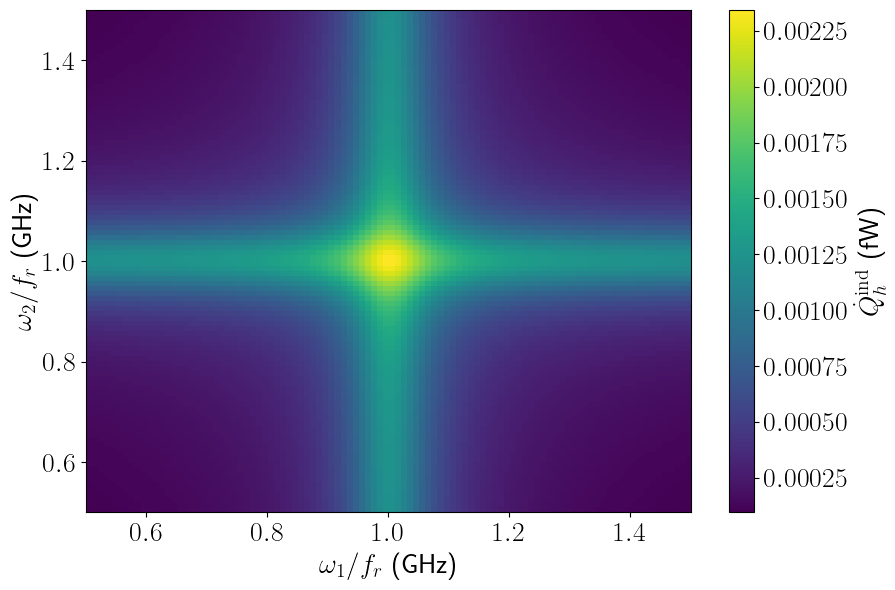

In [29]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_ind), 
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q^{\rm ind}_h$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()


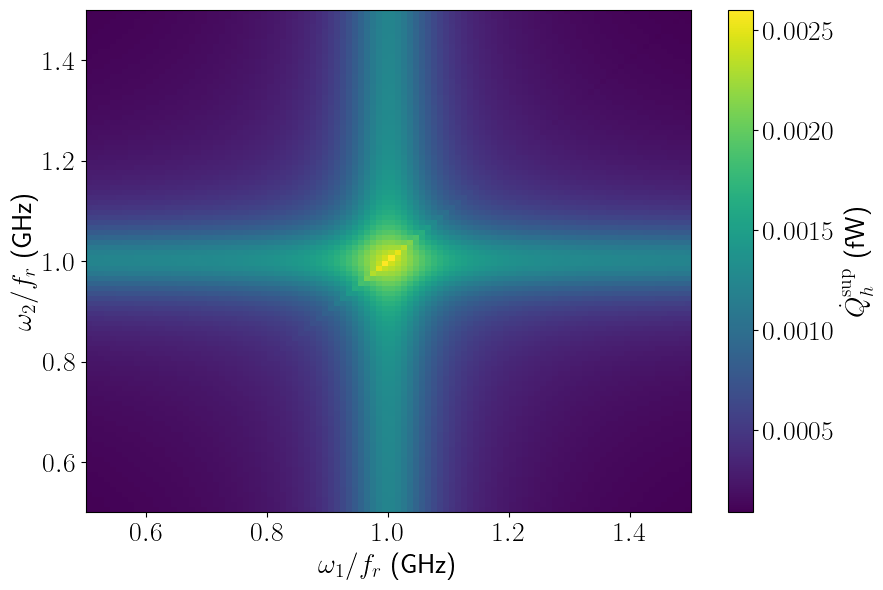

In [30]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sup),  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm sup}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

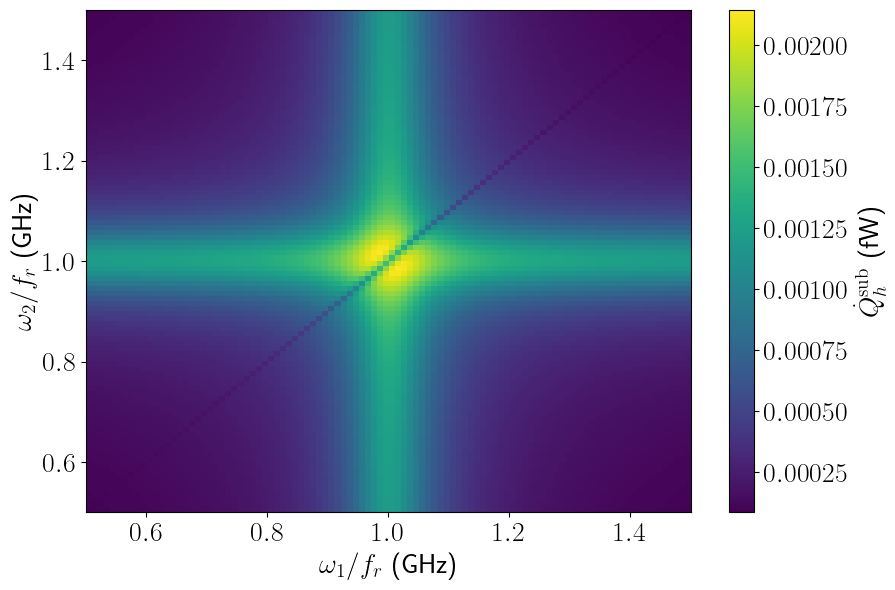

In [31]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    0.662607015*(Q_coll_sub),  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\dot Q_h^{\rm sub}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

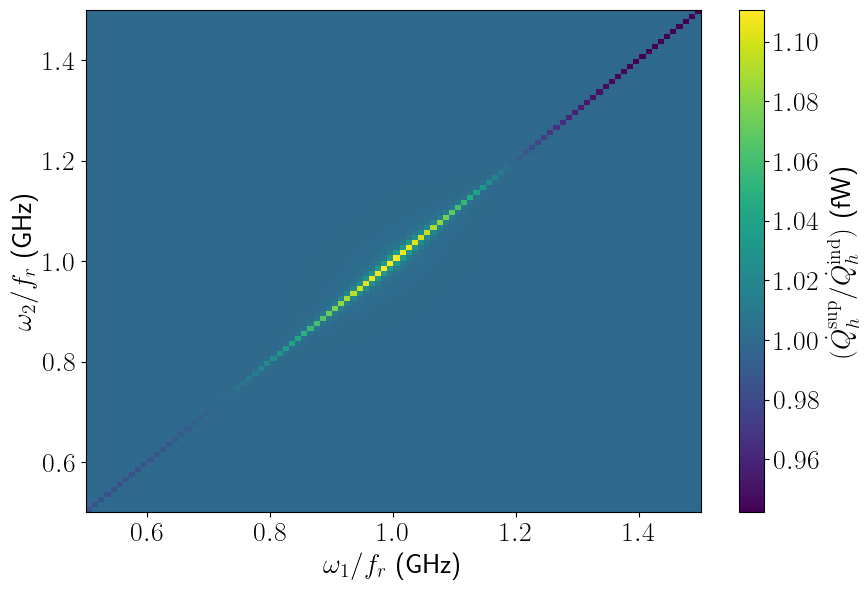

In [32]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sup,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm sup}/\dot Q_h^{\rm ind})$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()


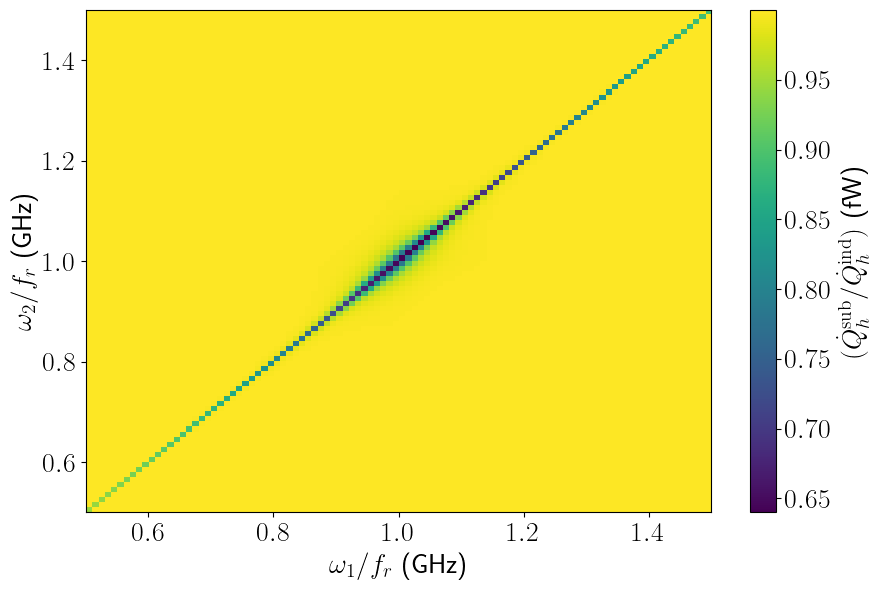

In [33]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Ratio_sub,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$(\dot Q_h^{\rm sub}/\dot Q_h^{\rm ind})$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

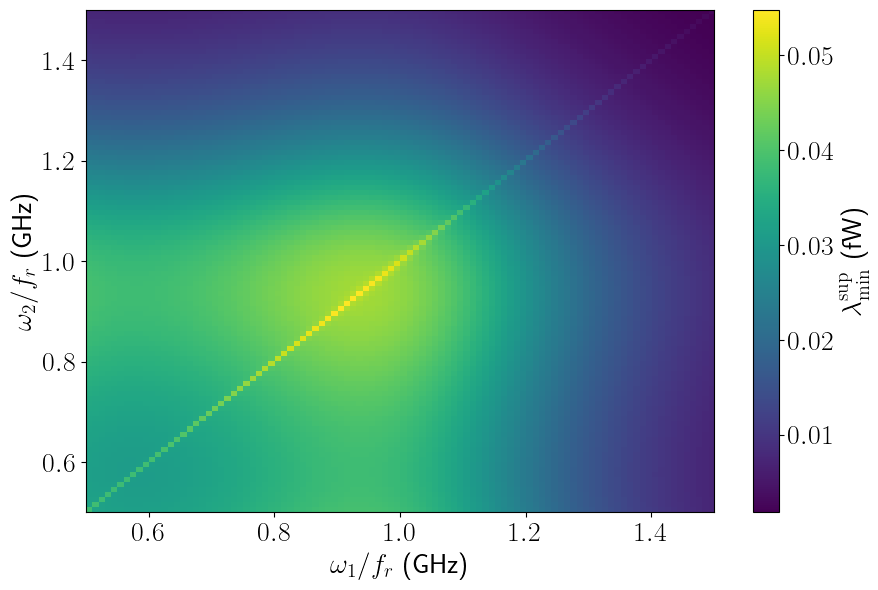

In [34]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sup,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm sup}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

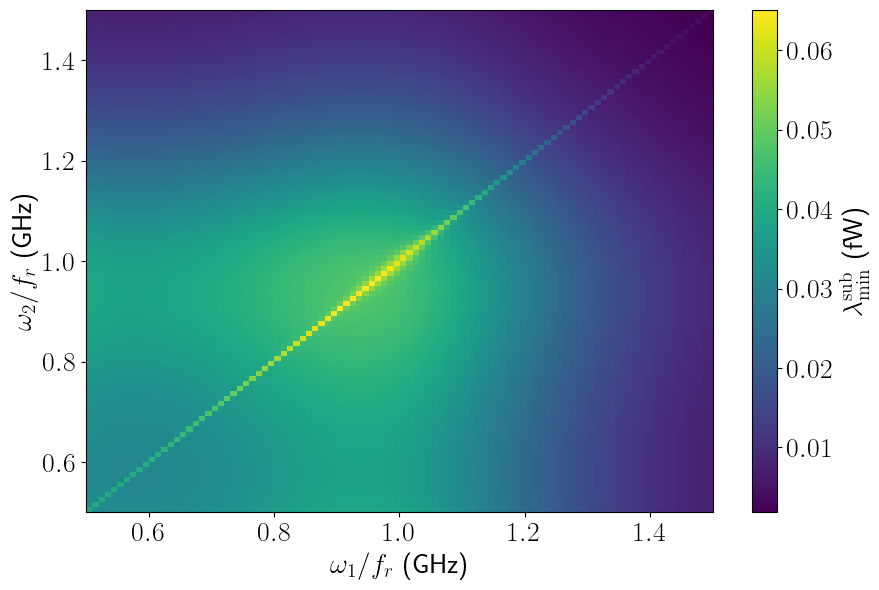

In [35]:
plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Lambda_sub,  # negative heat current for display
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower'
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)



# Catturo la colorbar in 'cbar'
cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\lambda_{\rm min}^{\rm sub}$ (fW)', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()

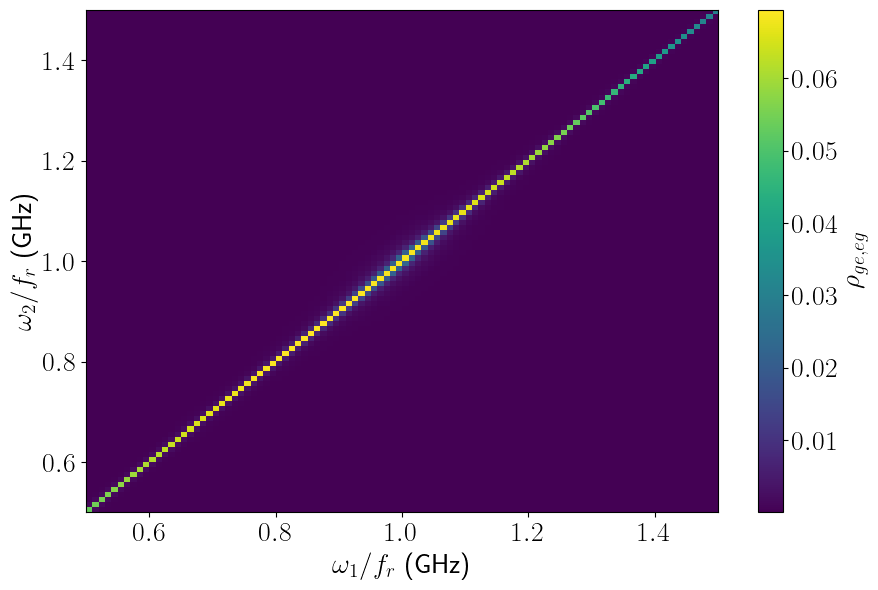

In [36]:
# Plotting one of the coherence terms in the density matrix

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Rho_coll_sup,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower',
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\rho_{ge, eg}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

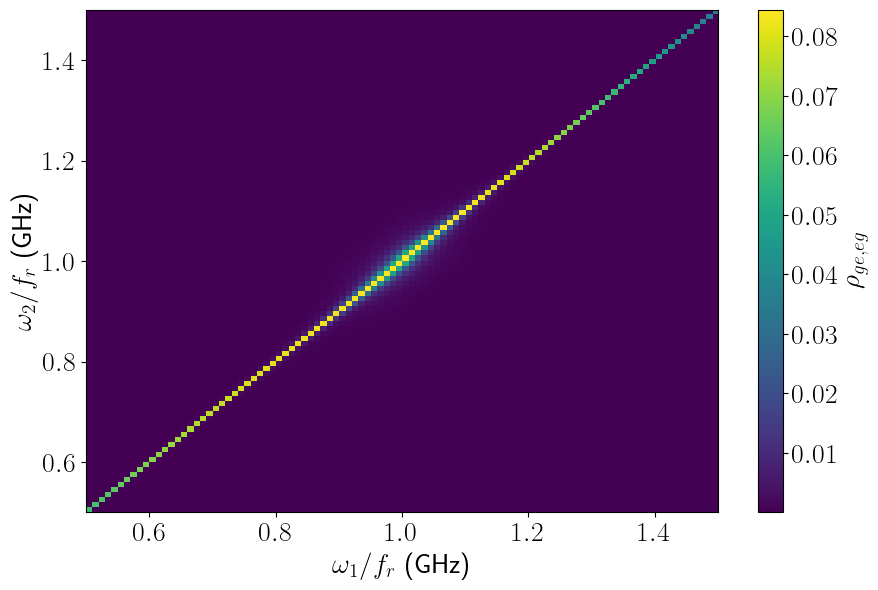

In [37]:
# Plotting one of the coherence terms in the density matrix

plt.figure(figsize=(9, 6))
rc('text',usetex=True)

cp = plt.imshow(
    Rho_coll_sub,  
    extent=(w_vals.min(), w_vals.max(), w_vals.min(), w_vals.max()),
    aspect='auto',
    origin='lower',
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'$\omega_1/f_r$ (GHz)', fontsize=20)
plt.ylabel(r'$\omega_2/f_r$ (GHz)', fontsize=20)

cbar = plt.colorbar(cp)
# Imposto la label con fontsize
cbar.set_label(r'$\rho_{ge, eg}$', fontsize=20)
# Regolo la dimensione dei tick
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

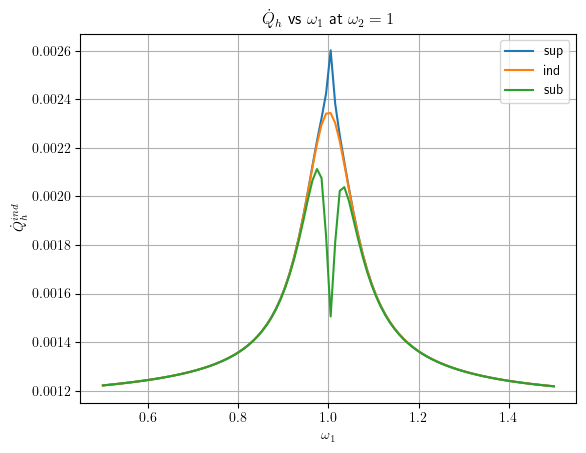

In [39]:
sup = 0.662607015*(Q_coll_sup[:, 50]) # in fW
ind = 0.662607015*(Q_ind[:, 50])
sub = 0.662607015*(Q_coll_sub[:, 50])

# Plot it

plt.plot(w_vals, sup, label = 'sup')
plt.plot(w_vals, ind, label = 'ind')
plt.plot(w_vals, sub, label = 'sub')
plt.xlabel(r'$\omega_1$')
plt.ylabel(r'$\dot{Q}_h^{ind}$')
plt.title(r'$\dot{Q}_h$ vs $\omega_1$ at $\omega_2 = 1$')
plt.legend()
plt.grid(True)
plt.show()